In [61]:
from sklearn.preprocessing import (LabelEncoder, LabelBinarizer, RobustScaler)

In [62]:
from sklearn.model_selection import (train_test_split, cross_val_score, StratifiedKFold ,GridSearchCV)

In [63]:
from sklearn.metrics import (accuracy_score, roc_auc_score, classification_report, confusion_matrix)

In [64]:
from sklearn.tree import DecisionTreeClassifier
from graphviz import Source
from sklearn.tree import export_graphviz

In [65]:
from sklearn.ensemble import GradientBoostingClassifier
import time
import warnings

warnings.filterwarnings('ignore')

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### 전처리 된 데이터 

# ada, gbc, xgb, lgbm 모델 함수

In [67]:
# ada, gbc, xgb, lgbm

In [148]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [149]:
ada = AdaBoostClassifier()
gbc = GradientBoostingClassifier()
xgb = XGBClassifier()
lgbm = LGBMClassifier()

In [150]:
models = [ada, gbc, xgb, lgbm]
model_names = ['Ada', 'GBC', 'XGB', 'LGBM']

In [151]:
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             f1_score, roc_auc_score, confusion_matrix)

def get_score(y_test, pred):
    acc = accuracy_score(y_test, pred)
    pre = precision_score(y_test, pred)
    rec = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    auc = roc_auc_score(y_test, pred)
   
    return acc, auc, pre, rec, f1

def print_score(y_test, pred, confusion=False, score=False):
    acc, auc, pre, rec, f1 = get_score(y_test, pred)
    con = confusion_matrix(y_test, pred)
    if confusion==True:
        print('confusion matrix')
        print(con)
        print('='*20)
    
    if score==True:
        print('Accuracy: {0:.4f}, AUC: {1:.4f}'.format(acc, auc))
        print('Recall: {0:.4f}, f1_score: {1:.4f}, precision: {2:.4f}'.format(rec, f1, pre))
        

In [152]:
def fit_model(model, X_train, X_test, y_train, y_test):
#     skfold = StratifiedKFold(n_splits=5)
#     cv_scores = []
#     for score in ['accuracy', 'roc_auc']:    
#         score_cv = cross_val_score(model, X_train, y_train, scoring=score, cv=5)
#         cv_scores.append(round(score_cv.mean(), 4))
    model.fit(X_train, y_train)
    y_pre_tr = model.predict(X_train)
    y_pre_test = model.predict(X_test)
    
    return get_score(y_test, y_pre_test)

def models_score_df(models, model_names, X_train, X_test, y_train, y_test):
    cols_names = ['accuracy', 'AUC', 'precision', 'recall', 'f1']
    datas = []
    for model in models:
        datas.append(fit_model(model, X_train, X_test, y_train, y_test))
     
    return pd.DataFrame(datas, columns=cols_names, index=model_names)


In [73]:
fit_model(ada, X_train, X_test, y_train, y_test)

(0.6504020467836257,
 0.6443137930095595,
 0.6419246002640457,
 0.7595903488977608,
 0.6958180950866591)

# 가중치 마지막

In [171]:
from sklearn.preprocessing import (LabelEncoder, LabelBinarizer, RobustScaler)

In [172]:
df = pd.read_csv('../MACH_data/data_cutoff_age18.csv' )

In [173]:
df= df[['score', 'v_score', 't_score', 'm_score', 'voted']]
df.head()

,score,v_score,t_score,m_score,voted
0,75.0,35.0,33.0,7.0,Yes
1,91.0,37.0,45.0,9.0,No
2,78.0,37.0,36.0,5.0,Yes
3,85.0,35.0,41.0,9.0,Yes
4,66.0,28.0,31.0,7.0,Yes


In [174]:
lb = LabelBinarizer()
df['voted'] = lb.fit_transform(df['voted'])
df

,score,v_score,t_score,m_score,voted
0,75.0,35.0,33.0,7.0,1
1,91.0,37.0,45.0,9.0,0
2,78.0,37.0,36.0,5.0,1
3,85.0,35.0,41.0,9.0,1
4,66.0,28.0,31.0,7.0,1
...,...,...,...,...,...
54713,59.0,28.0,26.0,5.0,0
54714,90.0,37.0,43.0,10.0,0
54715,69.0,34.0,27.0,8.0,0
54716,53.0,25.0,22.0,6.0,1


In [175]:
X = df.drop("voted", axis=1)

X =  pd.get_dummies(X)
Y = df.voted

In [176]:
Y

0        1
1        0
2        1
3        1
4        1
        ..
54713    0
54714    0
54715    0
54716    1
54717    0
Name: voted, Length: 54718, dtype: int64

In [177]:
X

,score,v_score,t_score,m_score
0,75.0,35.0,33.0,7.0
1,91.0,37.0,45.0,9.0
2,78.0,37.0,36.0,5.0
3,85.0,35.0,41.0,9.0
4,66.0,28.0,31.0,7.0
...,...,...,...,...
54713,59.0,28.0,26.0,5.0
54714,90.0,37.0,43.0,10.0
54715,69.0,34.0,27.0,8.0
54716,53.0,25.0,22.0,6.0


In [178]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,
                                                    random_state=13)

In [179]:
models_score_df(models, model_names, X_train, X_test, y_train, y_test)

,accuracy,AUC,precision,recall,f1
Ada,0.537646,0.527545,0.546234,0.718799,0.620747
GBC,0.539382,0.527113,0.544832,0.759417,0.634472
XGB,0.529788,0.522482,0.543935,0.660823,0.596708
LGBM,0.527412,0.518493,0.540172,0.687381,0.604950


In [180]:
gbc = GradientBoostingClassifier(random_state=13)

gbc.fit(X_train, y_train)

y_pre_tr=gbc.predict(X_train)
y_pre_test=gbc.predict(X_test)

print('Train ACC : {}, Train AUC : {}'.format(accuracy_score(y_train, y_pre_tr), 
                                              roc_auc_score(y_train, y_pre_tr)))
print('Test ACC : {}, test AUC : {}'.format(accuracy_score(y_test, y_pre_test), 
                                             roc_auc_score(y_test, y_pre_test)))

Train ACC : 0.5475853246219217, Train AUC : 0.5351192744335145
Test ACC : 0.5393823099415205, test AUC : 0.5271133617731958


In [100]:
score_fm = pd.DataFrame(zip(X_train.columns, gbc.feature_importances_), columns=['columns', 'importance'])
score_fm.sort_values('importance', ascending=False)

,columns,importance
1,v_score,0.569713
0,score,0.169283
2,t_score,0.164758
3,m_score,0.096247


In [101]:
X_train

,score,v_score,t_score,m_score
54695,94.0,39.0,45.0,10.0
46053,47.0,23.0,22.0,2.0
28461,71.0,32.0,32.0,7.0
32791,48.0,29.0,13.0,6.0
33975,88.0,42.0,38.0,8.0
...,...,...,...,...
22260,80.0,35.0,35.0,10.0
33634,67.0,33.0,28.0,6.0
32842,77.0,35.0,35.0,7.0
47280,72.0,38.0,28.0,6.0


## train test 나눠서 적용

In [102]:
X_train

,score,v_score,t_score,m_score
54695,94.0,39.0,45.0,10.0
46053,47.0,23.0,22.0,2.0
28461,71.0,32.0,32.0,7.0
32791,48.0,29.0,13.0,6.0
33975,88.0,42.0,38.0,8.0
...,...,...,...,...
22260,80.0,35.0,35.0,10.0
33634,67.0,33.0,28.0,6.0
32842,77.0,35.0,35.0,7.0
47280,72.0,38.0,28.0,6.0


In [181]:
df_tr = pd.concat([X_train, y_train], axis=1)
df_tr

,score,v_score,t_score,m_score,voted
54695,94.0,39.0,45.0,10.0,1
46053,47.0,23.0,22.0,2.0,1
28461,71.0,32.0,32.0,7.0,0
32791,48.0,29.0,13.0,6.0,0
33975,88.0,42.0,38.0,8.0,1
...,...,...,...,...,...
22260,80.0,35.0,35.0,10.0,1
33634,67.0,33.0,28.0,6.0,0
32842,77.0,35.0,35.0,7.0,0
47280,72.0,38.0,28.0,6.0,0


In [182]:
df_te = X_test
df_te

,score,v_score,t_score,m_score
33229,69.0,35.0,27.0,7.0
9494,66.0,30.0,30.0,6.0
19146,55.0,31.0,18.0,6.0
41249,76.0,38.0,32.0,6.0
46296,82.0,37.0,38.0,7.0
...,...,...,...,...
23269,74.0,33.0,36.0,5.0
34878,38.0,17.0,15.0,6.0
11125,76.0,31.0,39.0,6.0
21557,56.0,23.0,26.0,7.0


In [183]:
df_tr[["voted", "score"]].groupby("score").count()

,voted
score,
20.0,5
21.0,2
22.0,5
23.0,6
24.0,23
...,...
96.0,379
97.0,173
98.0,141


In [109]:
weight_all_tr = df_tr[["voted", "score"]].groupby("score").count()

In [184]:
weight_yes_tr = df_tr[["voted", "score"]].groupby("score").sum()

In [185]:
weight_no_tr = weight_all_tr - weight_yes_tr

In [186]:
df_weight_tr = (weight_yes_tr)/ weight_all_tr

In [114]:
df1_tr = pd.merge(left=df_tr, right=df_weight_tr, how="left", right_index=True, left_on="score")
df1_tr

,score,v_score,t_score,m_score,voted_x,voted_y
54695,94.0,39.0,45.0,10.0,1,0.479495
46053,47.0,23.0,22.0,2.0,1,0.579208
28461,71.0,32.0,32.0,7.0,0,0.513771
32791,48.0,29.0,13.0,6.0,0,0.539604
33975,88.0,42.0,38.0,8.0,1,0.476423
...,...,...,...,...,...,...
22260,80.0,35.0,35.0,10.0,1,0.550526
33634,67.0,33.0,28.0,6.0,0,0.540710
32842,77.0,35.0,35.0,7.0,0,0.485246
47280,72.0,38.0,28.0,6.0,0,0.497899


In [115]:
df1_te = pd.merge(left=df_te, right=df_weight_tr, how="left", right_index=True, left_on="score")
df1_te

,score,v_score,t_score,m_score,voted
33229,69.0,35.0,27.0,7.0,0.505895
9494,66.0,30.0,30.0,6.0,0.539863
19146,55.0,31.0,18.0,6.0,0.557252
41249,76.0,38.0,32.0,6.0,0.512922
46296,82.0,37.0,38.0,7.0,0.490244
...,...,...,...,...,...
23269,74.0,33.0,36.0,5.0,0.498889
34878,38.0,17.0,15.0,6.0,0.606299
11125,76.0,31.0,39.0,6.0,0.512922
21557,56.0,23.0,26.0,7.0,0.545676


In [131]:
np.unique(df1_tr.voted_y)

array([0.33333333, 0.41230769, 0.44444444, 0.45849802, 0.4591029 ,
       0.46502058, 0.46654275, 0.46699875, 0.47272727, 0.47347741,
       0.4751773 , 0.47642276, 0.478738  , 0.47898089, 0.47949527,
       0.48264278, 0.48497854, 0.4852459 , 0.4902439 , 0.49180328,
       0.4964539 , 0.49789916, 0.49888889, 0.5       , 0.50434783,
       0.50558036, 0.50589496, 0.50769231, 0.50793651, 0.50867052,
       0.51121076, 0.51292247, 0.51377119, 0.51497696, 0.51715686,
       0.52334419, 0.52597403, 0.52691867, 0.52900232, 0.5300207 ,
       0.53658537, 0.53960396, 0.53986333, 0.53987069, 0.54070981,
       0.545676  , 0.54787234, 0.54929577, 0.55052632, 0.55502392,
       0.55683453, 0.55725191, 0.55886333, 0.55952381, 0.5625    ,
       0.56521739, 0.56677019, 0.56696429, 0.56831683, 0.57536042,
       0.5760095 , 0.57920792, 0.58027079, 0.58095238, 0.58139535,
       0.58435208, 0.59611231, 0.6       , 0.60215054, 0.60606061,
       0.60629921, 0.60743802, 0.60784314, 0.61938534, 0.61964

In [134]:
np.unique(df1_te.voted.unique())

array([0.33333333, 0.41230769, 0.44444444, 0.45849802, 0.4591029 ,
       0.46502058, 0.46654275, 0.46699875, 0.47272727, 0.47347741,
       0.4751773 , 0.47642276, 0.478738  , 0.47898089, 0.47949527,
       0.48264278, 0.48497854, 0.4852459 , 0.4902439 , 0.49180328,
       0.4964539 , 0.49789916, 0.49888889, 0.5       , 0.50434783,
       0.50558036, 0.50589496, 0.50769231, 0.50793651, 0.50867052,
       0.51121076, 0.51292247, 0.51377119, 0.51497696, 0.51715686,
       0.52334419, 0.52597403, 0.52691867, 0.52900232, 0.5300207 ,
       0.53658537, 0.53960396, 0.53986333, 0.53987069, 0.54070981,
       0.545676  , 0.54787234, 0.54929577, 0.55052632, 0.55502392,
       0.55683453, 0.55725191, 0.55886333, 0.55952381, 0.5625    ,
       0.56521739, 0.56677019, 0.56696429, 0.56831683, 0.57536042,
       0.5760095 , 0.57920792, 0.58027079, 0.58095238, 0.58139535,
       0.58435208, 0.59611231, 0.6       , 0.60215054, 0.60606061,
       0.60629921, 0.60743802, 0.60784314, 0.61938534, 0.61964

## train

In [135]:
df1_tr

,score,v_score,t_score,m_score,voted_x,voted_y
54695,94.0,39.0,45.0,10.0,1,0.479495
46053,47.0,23.0,22.0,2.0,1,0.579208
28461,71.0,32.0,32.0,7.0,0,0.513771
32791,48.0,29.0,13.0,6.0,0,0.539604
33975,88.0,42.0,38.0,8.0,1,0.476423
...,...,...,...,...,...,...
22260,80.0,35.0,35.0,10.0,1,0.550526
33634,67.0,33.0,28.0,6.0,0,0.540710
32842,77.0,35.0,35.0,7.0,0,0.485246
47280,72.0,38.0,28.0,6.0,0,0.497899


In [136]:
df1_te

,score,v_score,t_score,m_score,voted
33229,69.0,35.0,27.0,7.0,0.505895
9494,66.0,30.0,30.0,6.0,0.539863
19146,55.0,31.0,18.0,6.0,0.557252
41249,76.0,38.0,32.0,6.0,0.512922
46296,82.0,37.0,38.0,7.0,0.490244
...,...,...,...,...,...
23269,74.0,33.0,36.0,5.0,0.498889
34878,38.0,17.0,15.0,6.0,0.606299
11125,76.0,31.0,39.0,6.0,0.512922
21557,56.0,23.0,26.0,7.0,0.545676


In [137]:
train_X=df1_tr.drop("voted_x", axis=1)
train_Y=df1_tr.voted_x

In [146]:
test_X=df1_te
test_Y=y_test

In [59]:
#train_X

In [163]:
train_X

,score,v_score,t_score,m_score,voted_y
54695,94.0,39.0,45.0,10.0,0.479495
46053,47.0,23.0,22.0,2.0,0.579208
28461,71.0,32.0,32.0,7.0,0.513771
32791,48.0,29.0,13.0,6.0,0.539604
33975,88.0,42.0,38.0,8.0,0.476423
...,...,...,...,...,...
22260,80.0,35.0,35.0,10.0,0.550526
33634,67.0,33.0,28.0,6.0,0.540710
32842,77.0,35.0,35.0,7.0,0.485246
47280,72.0,38.0,28.0,6.0,0.497899


In [168]:
test_X.columns = train_X.columns

In [169]:
test_X

,score,v_score,t_score,m_score,voted_y
33229,69.0,35.0,27.0,7.0,0.505895
9494,66.0,30.0,30.0,6.0,0.539863
19146,55.0,31.0,18.0,6.0,0.557252
41249,76.0,38.0,32.0,6.0,0.512922
46296,82.0,37.0,38.0,7.0,0.490244
...,...,...,...,...,...
23269,74.0,33.0,36.0,5.0,0.498889
34878,38.0,17.0,15.0,6.0,0.606299
11125,76.0,31.0,39.0,6.0,0.512922
21557,56.0,23.0,26.0,7.0,0.545676


In [170]:
# (yes-no)/all 가중 컬럼 추가 후 vote 예측 결과
models_score_df(models, model_names, train_X, test_X, train_Y, test_Y)

,accuracy,AUC,precision,recall,f1
Ada,0.537738,0.527680,0.546355,0.718104,0.620566
GBC,0.542032,0.531256,0.548492,0.735289,0.628300
XGB,0.527321,0.519422,0.541292,0.668981,0.598401
LGBM,0.537829,0.528377,0.547200,0.707342,0.617050


In [161]:
# score vtm 만으로 vote 예측 결과
models_score_df(models, model_names, X_train, X_test, y_train, y_test)

,accuracy,AUC,precision,recall,f1
Ada,0.537646,0.527545,0.546234,0.718799,0.620747
GBC,0.539382,0.527113,0.544832,0.759417,0.634472
XGB,0.529788,0.522482,0.543935,0.660823,0.596708
LGBM,0.527412,0.518493,0.540172,0.687381,0.604950


In [147]:
#yes
gbc = GradientBoostingClassifier(random_state=13)

gbc.fit(train_X, train_Y)

y_pre_tr=gbc.predict(train_X)
y_pre_test=gbc.predict(test_X)

print('Train ACC : {}, Train AUC : {}'.format(accuracy_score(train_Y, y_pre_tr), 
                                              roc_auc_score(train_Y, y_pre_tr)))
print('Test ACC : {}, test AUC : {}'.format(accuracy_score(test_Y, y_pre_test), 
                                             roc_auc_score(test_Y, y_pre_test)))

Train ACC : 0.5500296979942432, Train AUC : 0.5390135006765864
Test ACC : 0.54203216374269, test AUC : 0.5312563139954258


In [352]:
#no
gbc = GradientBoostingClassifier(random_state=13)

gbc.fit(train_X, train_Y)

y_pre_tr=gbc.predict(train_X)
y_pre_test=gbc.predict(test_X)

print('Train ACC : {}, Train AUC : {}'.format(accuracy_score(train_Y, y_pre_tr), 
                                              roc_auc_score(train_Y, y_pre_tr)))
print('Test ACC : {}, test AUC : {}'.format(accuracy_score(test_Y, y_pre_test), 
                                             roc_auc_score(test_Y, y_pre_test)))

Train ACC : 0.5500296979942432, Train AUC : 0.5390135006765864
Test ACC : 0.5501644736842105, test AUC : 0.5406260529605168


In [321]:
score_fm = pd.DataFrame(zip(train_X.columns, dt.feature_importances_), columns=['columns', 'importance'])
score_fm.sort_values('importance', ascending=False)

,columns,importance
2,t_score,0.275429
1,v_score,0.253563
3,m_score,0.182770
4,voted_y,0.156392
0,score,0.131846


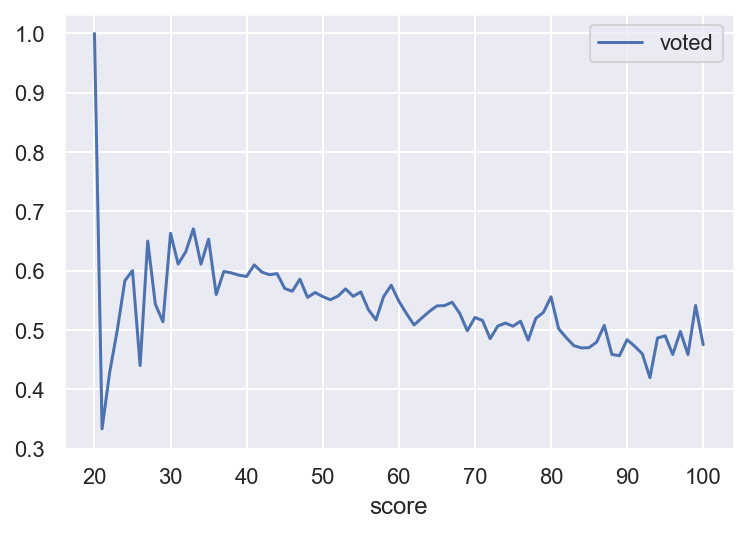

In [169]:
df_s.plot(kind="line")